Octavio Morales:
I pledge my honor that I have abided by the Stevens Honor System.

Before this code gets looked through, you mentioned to cite any sources used. Once again, although there isn't plagiarism, there are a LOT of tutorials online that helped me have a better understanding of this assignment, like the modules used. There are countless sources that I could mention, but some notable ones are geeksforgeeks.org, Corey Schafer (Youtube), freeCodeCamp.org (Youtube), Simplilearn (Youtube), and Intellipaat (Youtube). This was a lot. Also I am very tired and this assignment is stressful so I hope you like the assignment

Question 1 LDA [40 pts]
This problem expands the binary classifiers discussed in the lecture to the multi-classification case.
Use the following code to generate the train data set. The code will generate a random data set
with four features and classes.

Libraries

In [153]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

a. [20 pts] Modify the within-class (Sw) and between-class (SB) functions in the lecture note to calculate the scatter matrices. (using code provided from the lecture)

In [154]:
X, y= datasets.make_blobs(n_samples=400, n_features=4, centers=4, cluster_std=2, random_state=100)
labls= np.unique(y)
vecList= []
spot= 0
while(spot<len(labls)):
    vecList.append(np.mean(X[y == labls[spot]], axis=0))
    spot+= 1
print('Vectors: ',  vecList, '\n')
temp= np.mean(X, axis=0)
print("Mean: ", temp, '\n')


Vectors:  [array([ 0.82744825, -4.59819208, -1.45809237,  6.99189147]), array([-9.87038197, -7.71058888,  3.46678297,  6.29065458]), array([-7.22645471,  1.66250747,  7.72800594, -5.9162825 ]), array([-5.69657185, -7.85882945, -5.54778158,  9.74113663])] 

Mean:  [-5.49149007 -4.62627573  1.04722874  4.27685005] 



In [155]:
SW = np.zeros((4, 4))
spot = 0
while spot < len(labls):
    mv= vecList[spot]
    matri= np.zeros((4, 4))
    tempInd= 0
    while tempInd < len(X[y == labls[spot]]):
        tempX= X[y == labls[spot]][tempInd].reshape(4, 1)
        matri+= (tempX - mv.reshape(4, 1)).dot((tempX - mv.reshape(4, 1)).T)
        tempInd += 1
    SW += matri
    spot += 1

print("Matrix (Within-Class): ")
print(SW)


Matrix (Within-Class): 
[[1750.98152406  106.48932315  198.55647822 -169.76805166]
 [ 106.48932315 1723.81488361   41.4319164   133.18995014]
 [ 198.55647822   41.4319164  1636.0479396  -122.4631805 ]
 [-169.76805166  133.18995014 -122.4631805  1638.32393169]]


In [156]:
SB = np.zeros((X.shape[1], X.shape[1]))

spot = 0
while spot < len(vecList):
    SB += X[y == spot, :].shape[0] * (vecList[spot].reshape(X.shape[1], 1) - temp.reshape(X.shape[1], 1)).dot((vecList[spot].reshape(X.shape[1], 1) - temp.reshape(X.shape[1], 1)).T)
    spot += 1
print("Matrix (Between-Class): ")
print(SB)


Matrix (Between-Class): 
[[  6215.58365775    343.5454076   -3666.43317823   2490.20459148]
 [   343.5454076    5951.19739909   5579.96630527  -8790.09561851]
 [ -3666.43317823   5579.96630527  10025.78216681 -10606.46152794]
 [  2490.20459148  -8790.09561851 -10606.46152794  14518.52376827]]


b. [5 pts] Reduce the dimensions to 2-D by finding the eigenvalues, λ, and their corresponding eigenvectors using SB and Sw matrices found in a). Projectile points and visualize the result

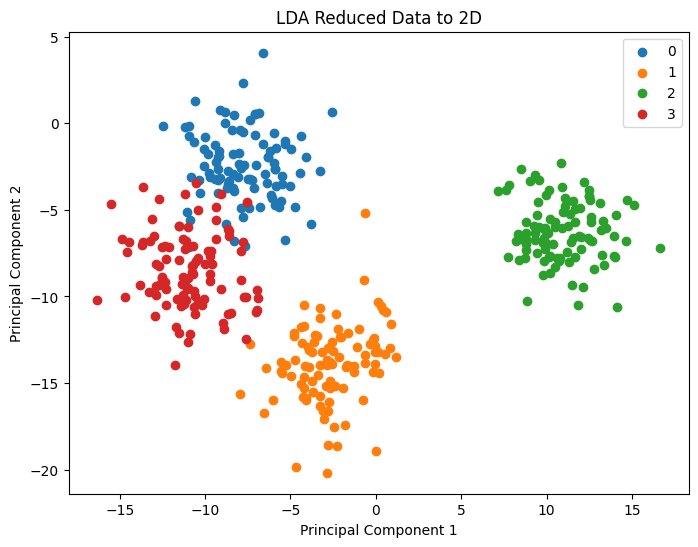

In [157]:
SW_inv = np.linalg.inv(SW)
eValues, eVec = np.linalg.eig(np.dot(SW_inv, SB))
sort = np.argsort(eValues)[::-1]
W = eVec[:, sort][:, :2]
redX = np.dot(X, W)

plt.figure(figsize=(8, 6))
for each in np.unique(y):
    plt.scatter(redX[y == each, 0], redX[y == each, 1], label=each)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('LDA Reduced Data to 2D')
plt.legend()
plt.show()


c. [10 pts] Within the reduced space, perform LDA with the provided implementation code to classify the target. Report the accuracy.
d. [5 pts] Perform scikit-learn LDA to classify the target in the original space by using the original data). Compare the results from c).

In [158]:
nX = np.dot(X, W)
model = LinearDiscriminantAnalysis()
model.fit(nX, y)
predY = model.predict(nX)
acc = accuracy_score(y, predY)
print("Accuracy: ", round(acc, 2))


Accuracy:  0.97


d.[5 pts] Perform scikit-learn LDA to classify the target in the original space by using the original data). Compare the results from c).

In [159]:
lda_orig = LinearDiscriminantAnalysis()
lda_orig.fit(X, y)
accurorg = accuracy_score(y, lda_orig.predict(X))
print("Accuracy: ", round(accurorg, 2))
print("The accury is different between the two parts because of the information that was lost in the process")


Accuracy:  0.98
The accury is different between the two parts because of the information that was lost in the process


Question 2: Scikit-learn linear regression. [20 pts]


a. [20 pts] Finish perceptron fit() code in the lecture notebook. (using pre-existed code before solving)

In [160]:
def af(input_value):
    if input_value >= 0:
        return int(1)
    else:
        return int(-1)

def fit(weights, f, l, r, ti):
    helptemp= range(ti)
    for ehh in helptemp:
        helpagain= range(len(l))
        for spot in helpagain:
            pred = af(np.dot(np.append(1, f[spot]), weights))
            if pred != l[spot]:
                weights += (l[spot] - pred) * np.append(1, f[spot])* r
    return weights


b. [15 pts] Set an arbitrary w vector to pass to perceptron fit(). Classify the target by increasing the epoch number with an interval of 25. Make a visualization showing the improvement of accuracy as the epoch number grows.

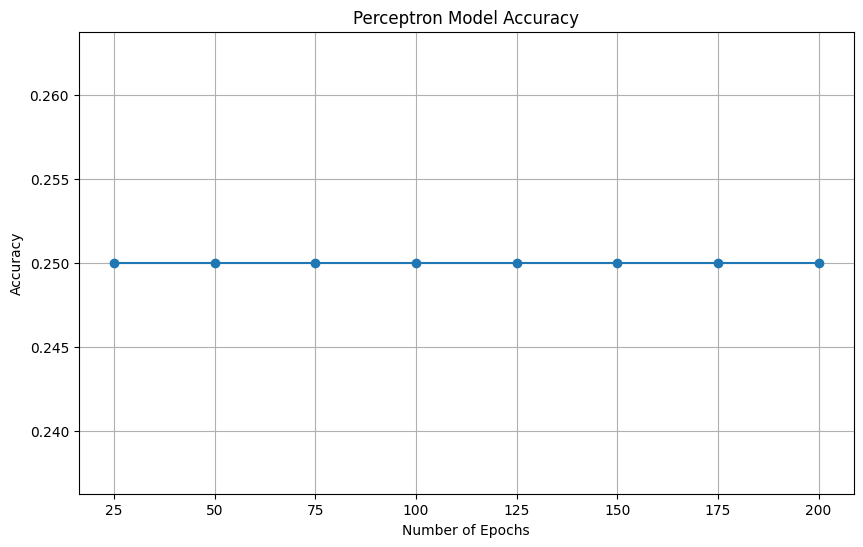

In [161]:
iWeight = np.random.rand(5)
lRR = 0.01
trainE = range(25, 201, 25)
accur = []

for e in trainE:
    weights= fit(iWeight.copy(), X, y, lRR, e)
    predictions= np.array([af(np.dot(np.append(1, xi), weights)) for xi in X])
    accuracy= np.mean(predictions == y)
    accur.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(trainE, accur, marker='o')
plt.title('Perceptron Model Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(list(trainE))
plt.show()


c. [5 pts] Run scikit-learn Perceptron to classify the target and compare the w vector with the obtained in b). Did you expect them to be the same? Explain why or why not.

In [162]:
nX = np.dot(X, W)
model = LinearDiscriminantAnalysis()
model.fit(nX, y)
predY = model.predict(nX)
acc = accuracy_score(y, predY)
print("Accuracy: ", round(acc, 2))


Accuracy:  0.97


I didn't expect it to be the same since the initial weights are usually set randomly.
